In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose
from keras.constraints import max_norm
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0

In [11]:
x_train.shape[0]

60000

In [4]:
#Using 0.5 as noise factor
noise_train_random = np.random.normal(0, 1, x_train.shape)
noisy_input_train = x_train + 0.5*noise_train_random

noise_test_random = np.random.normal(0, 1, x_test.shape)
noisy_input_test = x_test + 0.5*noise_test_random

In [5]:
inputs = (28, 28, 1)

model = Sequential()
#encode
model.add(Conv2D(filters = 64, kernel_size = (3,3), kernel_constraint = max_norm(2.0), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = inputs))
model.add(Conv2D(filters = 32, kernel_size = (3,3), kernel_constraint = max_norm(2.0), activation = 'relu', kernel_initializer = 'he_uniform'))

#decode
model.add(Conv2DTranspose(filters = 32, kernel_size = (3,3), kernel_constraint = max_norm(2.0), activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Conv2DTranspose(filters = 64, kernel_size = (3,3), kernel_constraint = max_norm(2.0), activation = 'relu', kernel_initializer = 'he_uniform'))

model.add(Conv2D(filters = 1, kernel_size = (3,3), kernel_constraint = max_norm(2.0), activation = 'sigmoid', padding = 'same'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 26, 26, 32)        9248      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 1)         577       
Total params: 47,425
Trainable params: 47,425
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
model.fit(noisy_input_train, x_train, epochs = 50, batch_size = 150, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 247s 5ms/step - loss: 0.1269 - val_loss: 0.1091
Epoch 2/50
48000/48000 [==============================] - 269s 6ms/step - loss: 0.1053 - val_loss: 0.1044
Epoch 3/50
48000/48000 [==============================] - 270s 6ms/step - loss: 0.1023 - val_loss: 0.1027
Epoch 4/50
48000/48000 [==============================] - 271s 6ms/step - loss: 0.1008 - val_loss: 0.1012
Epoch 5/50
48000/48000 [==============================] - 269s 6ms/step - loss: 0.0999 - val_loss: 0.1000
Epoch 6/50
48000/48000 [==============================] - 275s 6ms/step - loss: 0.0994 - val_loss: 0.0997
Epoch 7/50
48000/48000 [==============================] - 269s 6ms/step - loss: 0.0988 - val_loss: 0.0992
Epoch 8/50
48000/48000 [==============================] - 271s 6ms/step - loss: 0.0985 - val_loss: 0.0988
Epoch 9/50
48000/48000 [==============================] - 270s 6ms/step - loss: 0.0982 - val_loss: 0.0

In [7]:
samples = noisy_input_test[: 6]
prediction = model.predict(samples)

In [8]:
print(prediction)

[[[[2.44528055e-04]
   [4.71282983e-05]
   [2.97963270e-05]
   ...
   [1.60491822e-06]
   [2.09094151e-06]
   [8.65961047e-05]]

  [[3.21894404e-05]
   [9.94707170e-06]
   [3.21113766e-05]
   ...
   [2.20295897e-06]
   [1.55548969e-06]
   [2.99604544e-05]]

  [[1.24873750e-05]
   [1.19655724e-05]
   [1.22905167e-05]
   ...
   [4.73733189e-06]
   [8.63205878e-06]
   [3.45005865e-05]]

  ...

  [[7.45446869e-06]
   [8.58448061e-07]
   [3.41745113e-06]
   ...
   [3.68860929e-05]
   [5.62682635e-06]
   [1.11405743e-05]]

  [[1.47139899e-05]
   [3.93942912e-07]
   [1.37867505e-06]
   ...
   [2.14836055e-05]
   [3.14479848e-06]
   [1.80456736e-05]]

  [[4.31425578e-05]
   [2.20034690e-06]
   [2.49903769e-06]
   ...
   [8.20127661e-06]
   [6.70848112e-06]
   [1.66743994e-04]]]


 [[[1.63227320e-04]
   [1.40703596e-05]
   [3.99707460e-06]
   ...
   [2.88065024e-07]
   [5.47877335e-07]
   [3.01876044e-05]]

  [[1.69738087e-05]
   [1.93685014e-06]
   [1.49608525e-06]
   ...
   [4.92500021e-07]
 

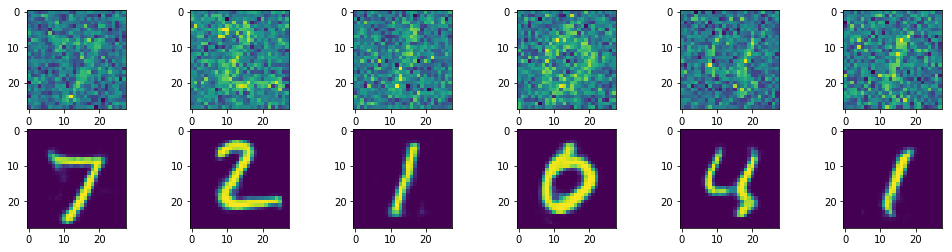

In [19]:
plt.figure(figsize=(20, 4))
for i in range(6):
    # display original
    ax = plt.subplot(2, 7, i + 1)
    plt.imshow(noisy_input_test[i].reshape(28, 28))
    
    # display reconstruction
    ax = plt.subplot(2, 7, i+1+7)
    plt.imshow(prediction[i].reshape(28, 28))
plt.show()